<a href="https://colab.research.google.com/github/shrishatuladhar/AI-ML/blob/main/ShrishaTuladhar_Worksheet05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WORKSHOP AND WORKSHEET 5**

# **Name: Shrisha Tuladhar**
# **Group: L6CG7 **

## WORKSHOP 5

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
print(x_train.shape)
print(x_test.shape)
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [ ]:
print(y_train[0])

5


In [ ]:
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",

loss="sparse_categorical_crossentropy", # labels are in integer
metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=1, batch_size=32, validation_data=(x_test, y_test))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.9128 - loss: 0.2835 - val_accuracy: 0.9837 - val_loss: 0.0515


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9810 - loss: 0.0622
Test accuracy: 0.9837


In [ ]:
predictions = model.predict(x_test[:5])
print(predictions.shape)
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
(5, 10)
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


# **WORKSHEET 5**

## Implement an End to End CNN Model for Image Classification Task.
## Objective

**Task 1: Data Understanding and Visualization:**
Download the Provided Data and Complete the following task.

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:

• Get the list of class directories from the train folder.
• Select one image randomly from each class.
• Display the images in a grid format with two rows using matplotlib.

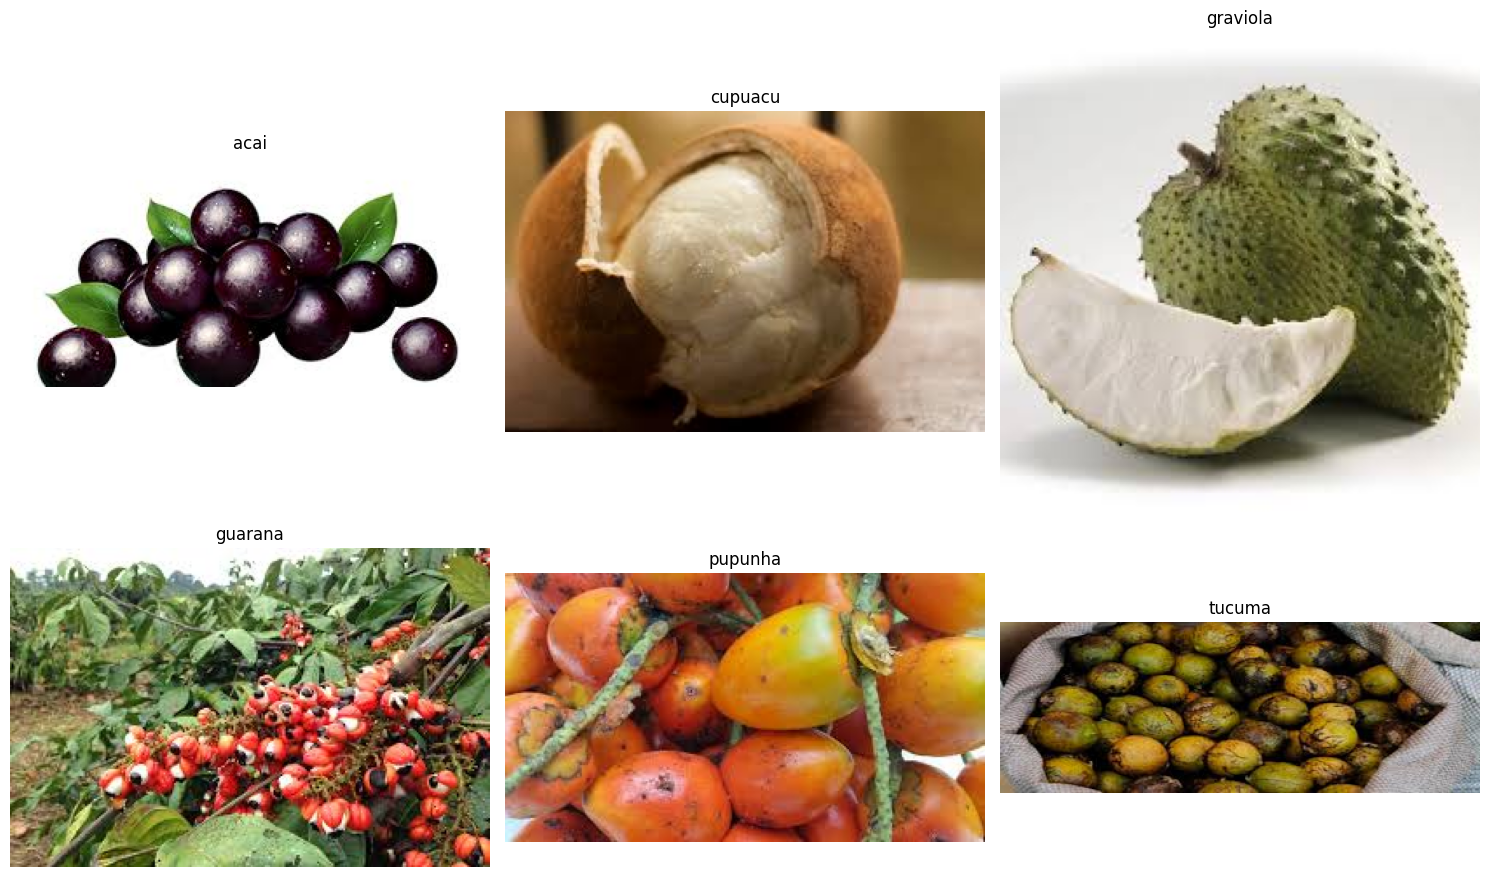

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
train_path = "/content/drive/MyDrive/Ai ML/Week5/FruitinAmazon/train"
test_path = "/content/drive/MyDrive/Ai ML/Week5/FruitinAmazon/test"
class_dirs = sorted([d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))])
num_classes = len(class_dirs)
plt.figure(figsize=(15, 10))
for i, class_dir in enumerate(class_dirs):
    class_path = os.path.join(train_path, class_dir)
    images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if images:
        random_image = random.choice(images)
        img = Image.open(os.path.join(class_path, random_image))
        plt.subplot(2, (num_classes+1)//2, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')

plt.tight_layout()
plt.show()

2. Check for Corrupted Image: Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from
the directory and print the message which image have been removed, if none found print ”No
Corrupted Images Found.”
• Hint:
– Iterate through each class subdirectory and check if each image is valid.
– Use the Image.open() function to attempt to load each image.
– If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from
the directory and print f"Removed corrupted image: {image_path}".
– Maintain a list of all corrupted image paths for reporting.
• Expected Output: No corrupted images found.

In [ ]:
corrupted_images = []

for root, dirs, files in os.walk(train_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                img.verify()
                img.close()
            except (IOError, SyntaxError) as e:
                print(f"Removed corrupted image: {file_path}")
                corrupted_images.append(file_path)
                os.remove(file_path)

if not corrupted_images:
    print("No corrupted images found.")

No corrupted images found.


**Task 2: Loading and Preprocessing Image Data in keras:**
In this section, we will load and preprocess image data from a directory using the
image dataset from directory function in Keras.

This function is used to load images from a directory structure where subdirectories represent different
classes. We will also apply basic preprocessing, including resizing and batching and normalization of
images. The same function can be used to load train and validation data.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

rescale = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))
val_ds = val_ds.map(lambda x, y: (rescale(x), y))
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Found 30 files belonging to 6 classes.


**Task 3 - Implement a CNN with**
Follow the following Structure and Hyper - parameters:
Convolutional Architecture:
• Convolutional Layer 1:
– Filter Size (F): (3, 3)
– Number of Filters (k): 32
– Padding (P): same
– Stride (s): 1
• Activation Layer: ReLU activation
• Pooling Layer 1: Max pooling
– Filter Size (F): (2, 2)
– Stride (s): 2
• Convolutional Layer 2:
– Filter Size (F): (3, 3)
– Number of Filters (k): 32
– Padding (P): same
– Stride (s): 1
• Activation Layer: ReLU activation
• Pooling Layer 2: Max pooling
– Filter Size (F): (2, 2)
– Stride (s): 2
Fully Connected Network Architecture:
• Flatten Layer: Flatten the input coming from the convolutional layers
• Input Layer:
• Hidden Layer - 2:
– Number of Neurons: 64
– Number of Neurons: 128
• Output Layer:
– Number of Neurons: num classes (number of output classes)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,222 (16.07 MB)

 Trainable params: 4,213,222 (16.07 MB)

 Non-trainable params: 0 (0.00 B)

**Task 4: Compile the Model**
Model Compilation
• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

**Task 4: Train the Model**
Model Training
• Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs
to 250.
• Use val ds for validation.

• Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoid-
ing overfitting.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("best_model.h5",
                            monitor='val_accuracy',
                            save_best_only=True,
                            mode='max',
                            verbose=1)

early_stopping = EarlyStopping(monitor='val_loss',
                              patience=10,
                              restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.1296 - loss: 2.0937
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 723ms/step - accuracy: 0.1319 - loss: 2.1269 - val_accuracy: 0.0000e+00 - val_loss: 2.6884
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.2280 - loss: 1.7582
Epoch 2: val_accuracy improved from 0.00000 to 0.05556, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 500ms/step - accuracy: 0.2405 - loss: 1.7453 - val_accuracy: 0.0556 - val_loss: 1.7518
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.3542 - loss: 1.5421
Epoch 3: val_accuracy improved from 0.05556 to 0.44444, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 915ms/step - accuracy: 0.3594 - loss: 1.5282 - val_accuracy: 0.4444 - val_loss: 1.4856
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.3883 - loss: 1.3839
Epoch 4: val_accuracy improved from 0.44444 to 0.66667, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 724ms/step - accuracy: 0.3989 - loss: 1.3660 - val_accuracy: 0.6667 - val_loss: 1.1697
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.5382 - loss: 1.1466
Epoch 5: val_accuracy did not improve from 0.66667
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step - accuracy: 0.5495 - loss: 1.1265 - val_accuracy: 0.6111 - val_loss: 0.9711
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.7488 - loss: 0.8414
Epoch 6: val_accuracy improved from 0.66667 to 0.77778, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 830ms/step - accuracy: 0.7561 - loss: 0.8219 - val_accuracy: 0.7778 - val_loss: 0.8700
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.9201 - loss: 0.5681
Epoch 7: val_accuracy improved from 0.77778 to 0.88889, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 728ms/step - accuracy: 0.9193 - loss: 0.5547 - val_accuracy: 0.8889 - val_loss: 0.4329
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.9097 - loss: 0.3972
Epoch 8: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 635ms/step - accuracy: 0.9115 - loss: 0.3865 - val_accuracy: 0.8333 - val_loss: 0.8260
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.9497 - loss: 0.2848
Epoch 9: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 729ms/step - accuracy: 0.9518 - loss: 0.2733 - val_accuracy: 0.7778 - val_loss: 0.5717
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - accuracy: 0.9091 - loss: 0.2685
Epoch 10: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step - accuracy: 0.9145 - loss: 0.2541 - val_accuracy: 0.8333 - val_loss: 0.6601
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.9595 - loss: 0.1602
Epoch 11: val_accuracy did not improve from 0.88

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 512ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9444 - val_loss: 0.1926
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 1.0000 - loss: 0.0032
Epoch 21: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.8889 - val_loss: 0.1924
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 1.0000 - loss: 0.0029
Epoch 22: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.8889 - val_loss: 0.2123
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 1.0000 - loss: 0.0022
Epoch 23: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8333 - val_loss: 0.2430
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 24: val_accuracy did not improve from 

**Task 5: Evaluate the Model**
Model Evaluation
• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

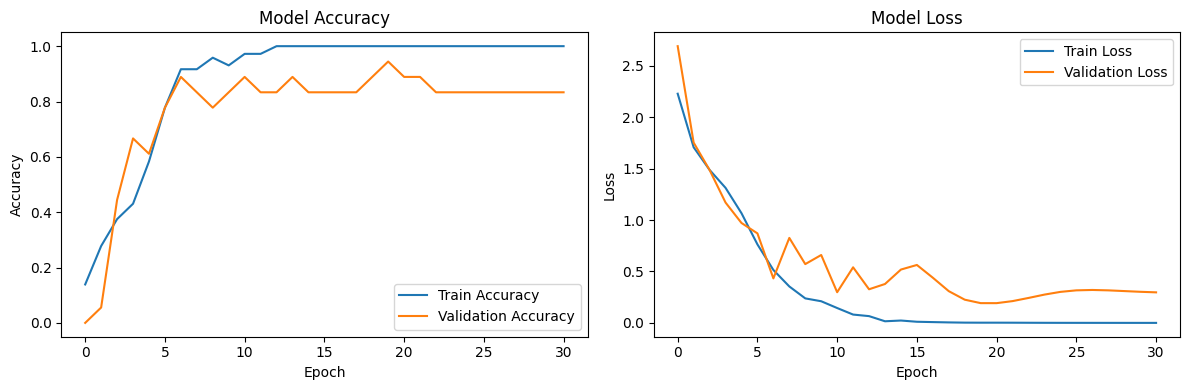

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.7333 - loss: 0.8730
Test Accuracy: 0.7333
Test Loss: 0.8730


In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

**Task 6: Save and Load the Model**
Model Saving and Loading
• Save the trained model to an .h5 file using model.save().
• Load the saved model and re-evaluate its performance on the test set.

In [ ]:
model.save("fruit_classifier.h5")

loaded_model = tf.keras.models.load_model("fruit_classifier.h5")
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(test_ds)
print(f"Loaded Model Test Accuracy: {loaded_test_acc:.4f}")
print(f"Loaded Model Test Loss: {loaded_test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.7333 - loss: 0.8730
Loaded Model Test Accuracy: 0.7333
Loaded Model Test Loss: 0.8730


**Task 7: Predictions and Classification Report**
Making Predictions
• Use model.predict() to make predictions on test images.
• Convert the model’s predicted probabilities to digit labels using np.argmax().
• Also use from sklearn.metrics import classification report to report the Classification
Report of your Model Performance.

Found 30 files belonging to 6 classes.
Classification Report:
              precision    recall  f1-score   support

        acai       0.80      0.80      0.80         5
     cupuacu       0.60      0.60      0.60         5
    graviola       0.62      1.00      0.77         5
     guarana       0.71      1.00      0.83         5
     pupunha       1.00      0.60      0.75         5
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.73        30
   macro avg       0.79      0.73      0.72        30
weighted avg       0.79      0.73      0.72        30



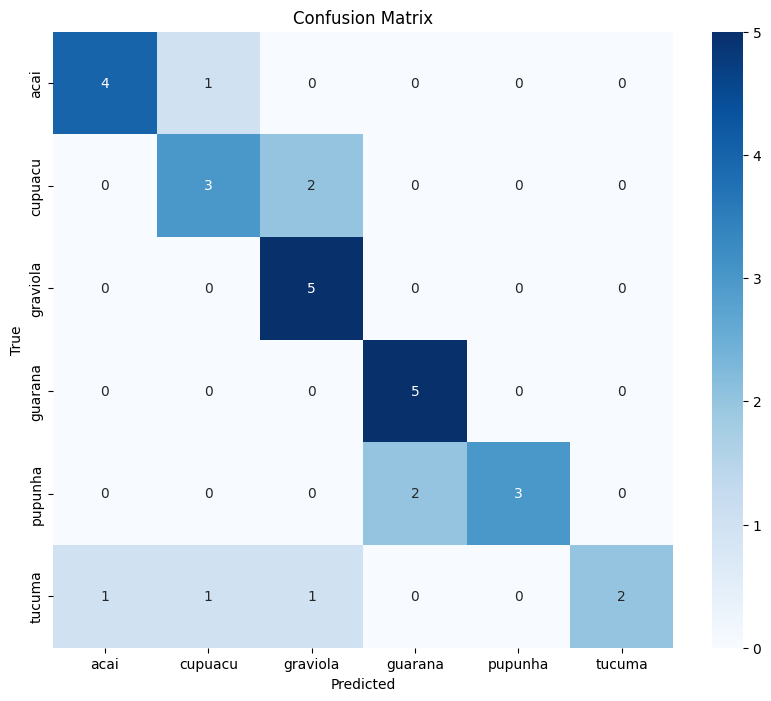

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

test_ds_for_names = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)
class_names = test_ds_for_names.class_names

y_true = []
y_pred = []

for images, labels in test_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Found 30 files belonging to 6 classes.

Overall Prediction Accuracy:
✅ Correct: 22/30 (73.3%)
❌ Incorrect: 8/30 (26.7%)


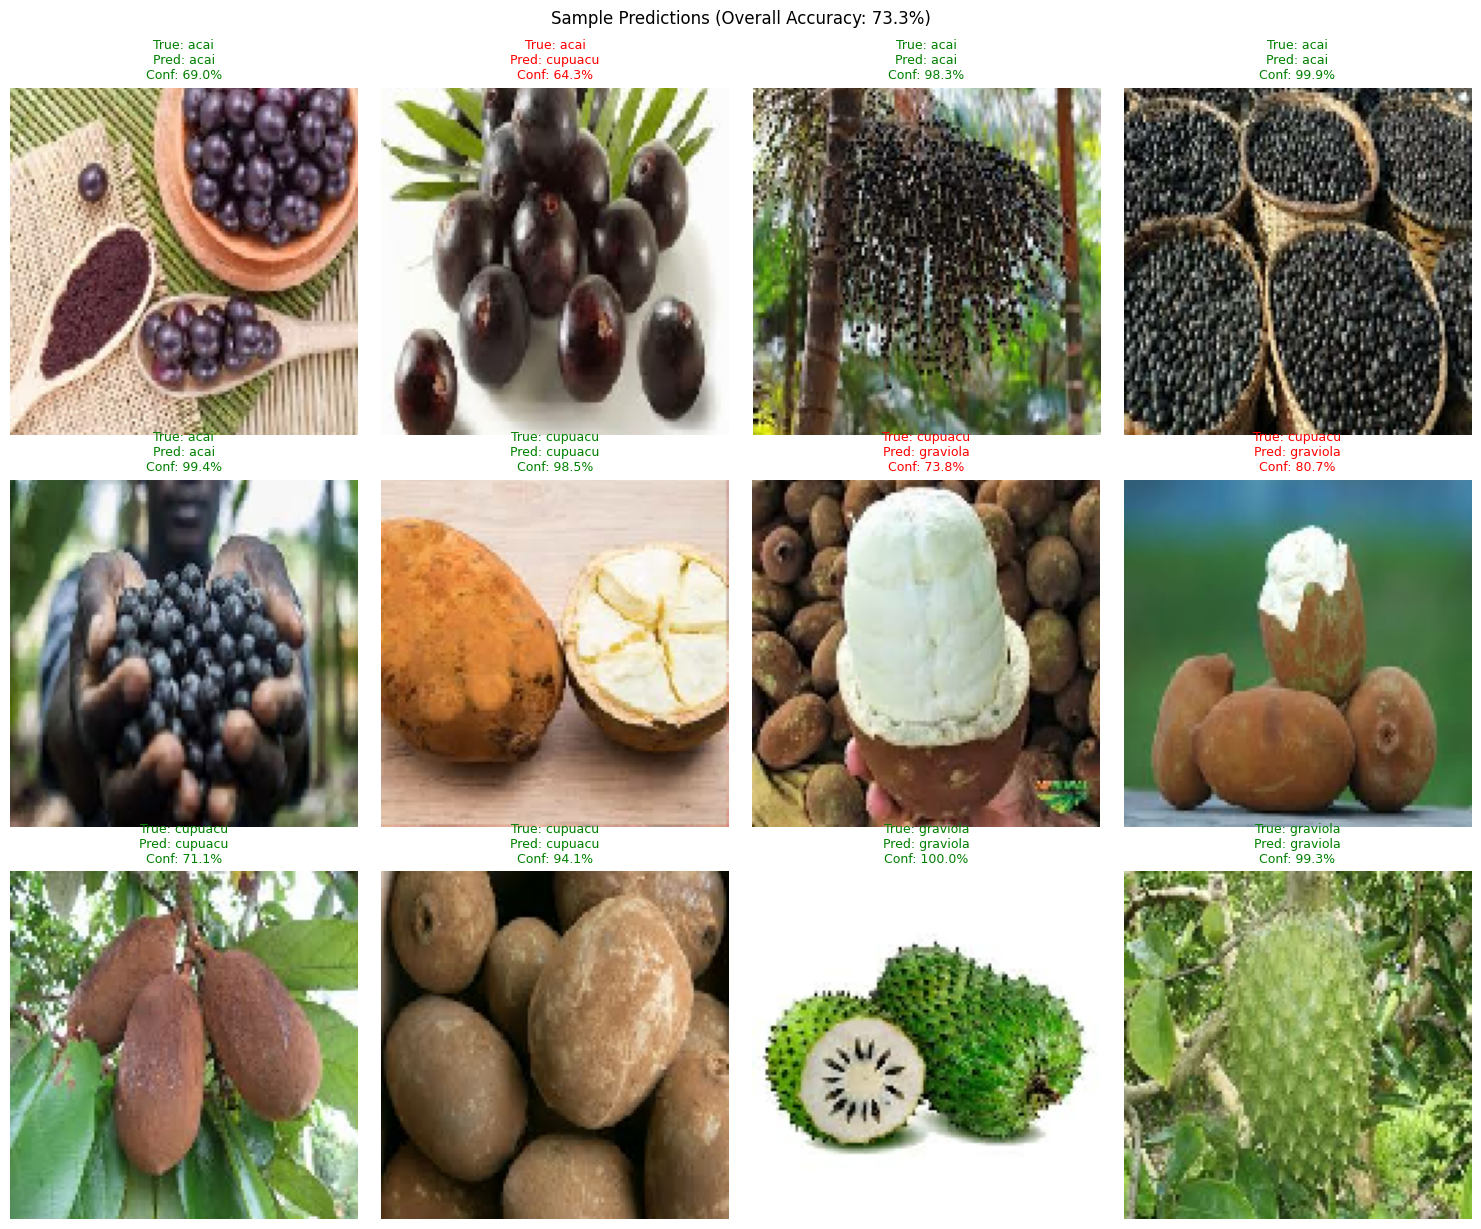

In [ ]:
test_ds_for_names = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)
class_names = test_ds_for_names.class_names

def evaluate_and_display_predictions(model, dataset, class_names, num_samples=12):
    total_samples = 0
    correct_predictions = 0
    all_true_labels = []
    all_predicted_labels = []
    all_confidences = []

    for images, labels in dataset:
        predictions = model.predict(images, verbose=0)
        predicted_labels = np.argmax(predictions, axis=1)
        confidence_scores = np.max(predictions, axis=1) * 100
        total_samples += len(labels)
        correct_predictions += np.sum(labels.numpy() == predicted_labels)

        all_true_labels.extend(labels.numpy())
        all_predicted_labels.extend(predicted_labels)
        all_confidences.extend(confidence_scores)

    accuracy = (correct_predictions / total_samples) * 100 if total_samples > 0 else 0

    print(f"\nOverall Prediction Accuracy:")
    print(f"✅ Correct: {correct_predictions}/{total_samples} ({accuracy:.1f}%)")
    print(f"❌ Incorrect: {total_samples - correct_predictions}/{total_samples} ({100 - accuracy:.1f}%)")
    plt.figure(figsize=(15, 12))

    for images, labels in dataset.take(1):
        if images.dtype == tf.float32:
            images = images * 255
        images = images.numpy().astype(np.uint8)
        for i in range(min(num_samples, len(images))):
            plt.subplot(3, 4, i+1)
            plt.imshow(images[i])

            true_class = class_names[labels[i]]
            pred_class = class_names[all_predicted_labels[i]]
            confidence = all_confidences[i]

            color = "green" if true_class == pred_class else "red"
            plt.title(f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.1f}%",
                     color=color, fontsize=9)
            plt.axis("off")

    plt.tight_layout()
    plt.suptitle(f"Sample Predictions (Overall Accuracy: {accuracy:.1f}%)", y=1.02)
    plt.show()
evaluate_and_display_predictions(model, test_ds, class_names)

Expected Deliverables
• Code Implementation: Complete code for building, training, evaluating, saving, and loading
the model.
• Visualization: Graphs showing the training and validation loss and accuracy.
• Classification Report: Display the final Classification Report on test data.
• Saved Model: Submit the saved .h5 model file.


 Comprehensive Evaluation Report
 Overall Correct: 22/30 (73.3%)
 Overall Incorrect: 8/30 (26.7%)

🔍 Class-wise Performance:
acai      : 4/5 (80.0%)
cupuacu   : 3/5 (60.0%)
graviola  : 5/5 (100.0%)
guarana   : 5/5 (100.0%)
pupunha   : 3/5 (60.0%)
tucuma    : 2/5 (40.0%)


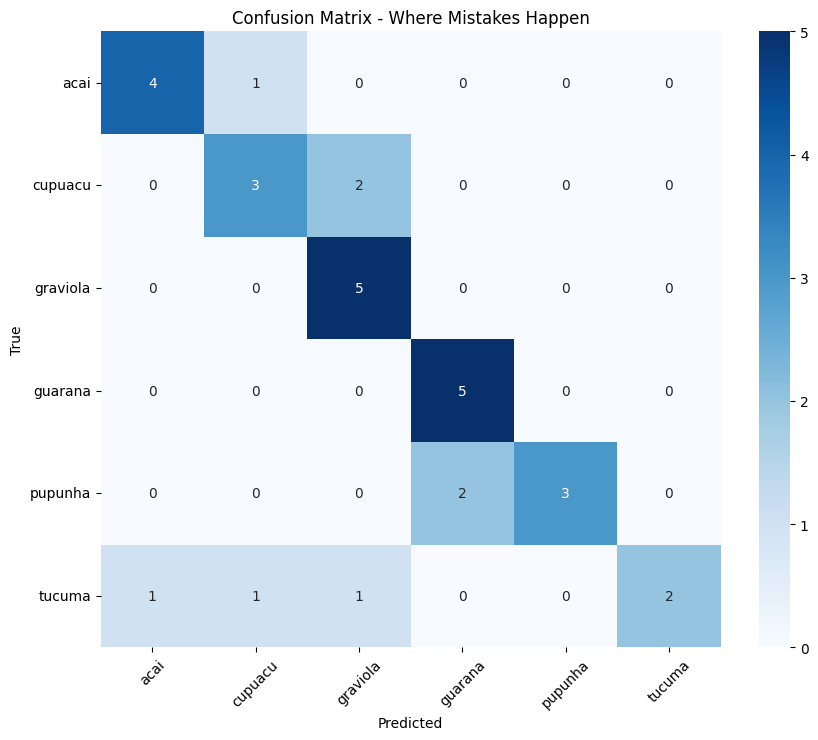

In [ ]:
def comprehensive_evaluation(model, dataset, class_names):
    total_samples = 0
    correct_predictions = 0
    class_stats = {name: {'correct': 0, 'total': 0} for name in class_names}
    y_true = []
    y_pred = []

    for images, labels in dataset:
        predictions = model.predict(images, verbose=0)
        predicted_labels = np.argmax(predictions, axis=1)
        total_samples += len(labels)
        batch_correct = np.sum(labels.numpy() == predicted_labels)
        correct_predictions += batch_correct
        for true, pred in zip(labels.numpy(), predicted_labels):
            class_stats[class_names[true]]['total'] += 1
            if true == pred:
                class_stats[class_names[true]]['correct'] += 1

        y_true.extend(labels.numpy())
        y_pred.extend(predicted_labels)

    accuracy = (correct_predictions / total_samples) * 100

    print("\n Comprehensive Evaluation Report")
    print(f" Overall Correct: {correct_predictions}/{total_samples} ({accuracy:.1f}%)")
    print(f" Overall Incorrect: {total_samples - correct_predictions}/{total_samples} ({100 - accuracy:.1f}%)")

    print("\n🔍 Class-wise Performance:")
    for class_name in class_names:
        stats = class_stats[class_name]
        if stats['total'] > 0:
            acc = (stats['correct'] / stats['total']) * 100
            print(f"{class_name:<10}: {stats['correct']}/{stats['total']} ({acc:.1f}%)")

    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Where Mistakes Happen')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()
    return {
        'accuracy': accuracy,
        'class_stats': class_stats,
        'confusion_matrix': cm
    }

eval_results = comprehensive_evaluation(model, test_ds, class_names)